# Interface en ligne de commande (CLI)

- Consititue un moyen d’interagir avec les scripts Python via la ligne de commande.
- Sur une ligne de commande, l'utilisateur donne ses ordres au système sous forme de texte.
- Dans Windows, la ligne de commande est accessible via la Console de Windows en lançant l'application "Command Prompt (cmd)". 

**Avantages d’une interface en ligne de commande :**
- Automatiser les tâches.
- Moins gourmande en ressources que les interfaces graphiques.
- Interface préférée d’un grand nombre d’informaticiens.

Les commandes courantes utilisées sur une ligne de commande :

- "cd" permet de changer de répertoire.
- "dir" permet d'avoir la liste des fichiers et sous-répertoires du répertoire courant.
- "mkdir" permet de créer un répertoire.
- "." désigne le répertoire courant. ".." désigne le répertoire parent. "\" désigne la racine du disque.
- Pour accèder à la ligne de commande à partir d'un notebook, on précède la commande par "!".

**Il y a deux moyens pour exécuter un programme Python à partir de la ligne de commande :**
- En utilisant le module "sys" (utilisation limitée)
- En utilisant le module "argparse" (utilisation avancée et préférable) 

Pour exécuter un programme Python à partir de la ligne de commande sous Windows on fait :
- python nomfichier (en incluant l'extension "py")
ou simplement :
- nomfichier (avec l'extension py)



In [ ]:
#Contenu du fichier greet.py

print("Bonjour")

In [ ]:
! CLI\greet.py

Sur les systèmes Unix, il faut faire :
 - chmod a+x exemple1.py  (le fichier est maintenant exécutable_
 - greet.py


## Arguments d'une ligne de commande
- Un argument est un paramètre qu’on fait passer à la ligne de commande dont la valeur influe sur l’exécution d’un programme.
- Exemple : faire passer le nom d’un fichier ou la valeur d’une variable.
- Syntaxe d’une commande avec arguments : python script.py arg1 arg2 arg3


## Accès aux arguments d’une ligne de commande avec le module sys :

La variable «argv» du module «sys» est une liste qui contient tous les arguments de la ligne de commande commençant par le nom du fichier :

- sys.argv[0] : nom du fichier
- sys.argv[1] : premier argument
- sys.argv[-1] : dernier argument
- sys.argv[1:] : liste des arguments 

    


In [ ]:
#Contenu du fichier greetArg.py

import sys
if len(sys.argv)!=2:
    print("Usage : {0} prenom".format(sys.argv[0]))
else:    
    print("Bonjour {}".format(sys.argv[1]))


In [ ]:
! CLI\greetArg.py Sami

Exercice 1 : Exécuter un programme Python à partir de la ligne de commande qui permet d'afficher "Premier" si le nombre fourni en argument est premier et "Composé" sinon.

In [ ]:
import sys
from math import sqrt
if len(sys.argv)!=2:
   print("Usage fichier entier")  
else:
    premier=True
    i=2
    n=int(sys.argv[1])
    while i<=sqrt(n) and premier:
        if n%i==0:
            premier=False
            
        i=i+1
    if premier:
        print(n,"Premier")
    else:
        print(n,"Compose")


In [ ]:
!CLI\estPremier.py 9

Exercice 2 : Exécuter un programme Python à partir de la ligne de commande qui permet de copier le contenu d'un fichier texte dont le nom est fourni comme premier argument, en un deuxième fichier texte dont le nom est fourni comme deuxième argument.

In [ ]:
import sys
if len(sys.argv)!=3:
    print("Erreur")
else:
    fichier1=sys.argv[1]
    fichier2=sys.argv[2]
    with open(fichier1,'r') as f1:
        s=f1.read()
    with open(fichier2,'w') as f2:
        f2.write(s)
    

In [ ]:
!CLI\fcopy.py CLI\fich1.txt

## Le module "argparse" : meilleure analyse d’une ligne de commande !

- Aide sur l’utilisation de la commande. 
- Control individuel de chaque argument.
- Choix du type des arguments (int, float, str,…).
- Ajout d’arguments obligatoires ou optionnels.

## Ajout d'arguments positionnels

In [ ]:
import argparse

# python argparseArg.py Sami
# python argparseArg.py -h

parser = argparse.ArgumentParser() #Créer un objet "parser" de la classe ArgumentParser
parser.add_argument("prenom", help="Saisir le prénom d'une personne") #ajouter à cet objet un argument. Ici le nom "prenom" est donné comme nom de l'argument
args = parser.parse_args() #récupérer tous les arguments ajoutés dans "args"

print("Bonjour {}".format(args.prenom)) #accéder à l'argument "prenom"

1- importer le module "argparse"

2- créer un objet "parser" avec la classe "ArgumentParser"

3- ajouter à "parser" un argument obligatoire (positionnel) en ajoutant une aide sur cet argument (facultatif)

4- appeler la méthode parse_args() qui retourne "args" permettant d'accéder aux arguments ajoutés.

In [ ]:
!CLI\argparseArg.py John

In [ ]:
!CLI\argparseArg.py -h

Exemple 2: le script suivant sera exécuté sur la ligne de commande. Il va afficher "Bonjour" en mentionnant le prénom et le nom d'une personne donné en argument.

In [ ]:
import argparse

# python argparseArg2.py Sami
# python argparseArg2.py -h

parser = argparse.ArgumentParser() #Créer un objet "parser" de la classe ArgumentParser
parser.add_argument("prenom", help="Saisir le prénom d'une personne") #ajouter à cet objet un premier argument. Ici "prenom" est donné comme nom de l'argument
parser.add_argument("nom", help="Saisir le nom d'une personne") #ajouter à cet objet un deuxième argument. Ici "nom" est donné comme nom de l'argument
args = parser.parse_args() #récupérer tous les arguments ajoutés dans "args"

print(f"Bonjour {args.prenom} {args.nom}") #accéder aux argument "prenom" et "nom"

In [ ]:
!CLI\argparseArg2.py Smith John

In [ ]:
!CLI\argparseArg2.py -h

Attention ! Les 2 arguments "prenom" et "nom" sont obligatoires et positionnels. Il faut respecter la position des 2 arguments dans la commande.

In [ ]:
!CLI\argparseArg2.py John

In [ ]:
!CLI\argparseArg2.py Smith John

### Choisir le type des arguments

Il est possible avec le module "argparse" de choisir le type des arguments en mentionnant le type dans la créations des arguments :


In [ ]:
import argparse

# python argparseEntiers.py -h
# python argparseEntiers.py 4 3

parser = argparse.ArgumentParser()
parser.add_argument("a", help="premier entier", type=int)

parser.add_argument("b",help="deuxieme entier",type=int)

args = parser.parse_args()

print(args.a+args.b)



In [ ]:
!CLI\argparseEntiers.py 8 9

Exercice 1 : Ecrire un script qui sera exécuté à partir de la ligne de commande, permettant de calculer le BMI d'une personne suivant la formule ci-dessous :
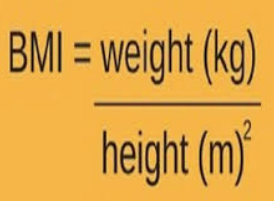


Ensuite, de déterminer le degré de maigreur ou d'obésité suivant la règle suivante :
- On considère généralement comme satisfaisant un BMI entre 18,5 et 25.
- Si le BMI est inférieur à 18,5 on est probablement trop maigre.
- Si le BMI se situe entre 25 et 30 on a probablement quelques kilos en trop.
- Si le BMI se situe entre 30 et 40 on est obèse.
- A partir d'un BMI de 40 il s'agit d'une obésité morbide.

In [ ]:
import argparse

# python argparseBMI.py -h
# python argparseBMI.py 55 1.70  

parser = argparse.ArgumentParser()
parser.add_argument("poids", help="poids en Kg", type=float)
parser.add_argument("taille", help="taille en m", type=float)
args = parser.parse_args()
bmi=args.poids/(args.taille**2)
if bmi<18.5:
    print("Trop maigre")
elif bmi<25:
    print("Satisfaisant")
elif bmi<30:
    print("Surpoids")
else:
    print("Obèse")

In [ ]:
!CLI\argparseBMI.py 65 1.65 

## Ajout d'arguments optionnels

- L’ajout d’un argument optionnel se  fait en précédant l’argument par “--”.

- Il est possible d’en faire une version simplifiée avec “-”.

- On peut omettre les arguments optionnels d’une ligne de commande.

- Avec la possibilité de les rendre obligatoires en affectant la valeur True au paramètre required.


In [ ]:
import argparse #python > 3.2 ou > 2.7
import argparse 

# python argparseOptions.py Michel Dupont
# python argparseOptions.py -s Hola Michel Dupont
# python argparseOptions.py -s Hola -p Mr Michel Dupont
# python argparseOptions.py -s Hola -p Mr Michel

desc = "Inspection des parametres et options de la ligne de commande"
parser = argparse.ArgumentParser(description = desc)
parser.add_argument('-s','--salutation',help = 'la salutation a utiliser',required=True)
parser.add_argument('-p','--prefix',help = 'le prefix a utiliser',required = False)
parser.add_argument("prenom")
parser.add_argument("nom")

args = parser.parse_args()

salutation = "Hello"
prefix = "Mr./Ms."

if args.salutation:
    salutation = args.salutation
if args.prefix:
    prefix = args.prefix
    
print(f"{salutation}  {prefix} {args.prenom} {args.nom}")


In [ ]:
!CLI\argparseOptions.py -h

In [ ]:
import argparse

# python volumePyramide.py -c 9 -ha 20 

desc = "Calcul du volume d'une pyramide"
parser = argparse.ArgumentParser(description = desc)

parser.add_argument("--cote","-c",help="cote de la base",type=float,required=True)
parser.add_argument("--hauteur","-ha",help="Hauteur de la pyramide",type=float,required=True)

args = parser.parse_args()

aire=args.cote**2
volume=aire*args.hauteur/3
print(f" Le volume de la pyramide vaut {volume}")


In [ ]:
!CLI\volumePyramide.py -c 9 -ha 5

In [ ]:
!CLI\volumePyramide.py -h


Exercice 2:
Ecrire un script qui sera exécuté à partir de la ligne de commande qui, à partir d'un fichier source, créé un fichier destination contenant le texte du fichier source en insérant entre les lignes de texte un nombre de lignes vides donné comme argument optionnel.   

In [ ]:
# Charbel Farah
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('f1')
parser.add_argument('f2')
parser.add_argument('--empty_line','-el', required=False, type=int)
args = parser.parse_args()
with open(args.f1) as f1:
    with open(args.f2, 'w') as f2:
        if not args.empty_line:
            s=f1.read()
            f2.write(s)
        else:
            for line in f1:
                f2.write(line)
                f2.write('\n' * args.empty_line)

In [ ]:
!CLI\fcopy_ligVides.py -el 2 CLI\fichier1.txt CLI\fichier2.txt 